In [121]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad

In [2]:
# find mean, median, mode and standard deviation of the following for 1 and 2
# 1.


l = [6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8]

print("mean: ", np.mean(l))
print("median: ",np.median(l))
print("mode: ",stats.mode(l))
print("std deviation: ", np.std(l))

mean:  6.85
median:  7.0
mode:  ModeResult(mode=array([7]), count=array([5]))
std deviation:  1.5898113095584647


In [3]:
#2.

calls = [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70,
         40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97,
         75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]

print("mean: ", np.mean(calls))
print("median: ",np.median(calls))
print("mode: ",stats.mode(calls))
print("std deviation: ", np.std(calls))

mean:  107.51428571428572
median:  100.0
mode:  ModeResult(mode=array([75]), count=array([4]))
std deviation:  38.77287080168403


In [4]:
# 3. find the mean and variance

x = np.array([0, 1, 2, 3, 4, 5 ])
y = np.array([0.09, 0.15, 0.40, 0.25, 0.10, 0.01 ]) # f(x)

XcrossY = x*y
mean = XcrossY.sum()
print("mean is:",mean)

XminusMean = (x-mean)
squared = np.square(XminusMean)
var = squared*y
var.sum()
print("variance is: ",var.sum())

mean is: 2.15
variance is:  1.2275


In [5]:
# 4. we need to find the pdf for values above 12.6

# using the given formula we can take its integral from 12.6 to infinity


from scipy import integrate
a=20
b=12.5

def integrand(d,a,b):
    return a*np.exp(-a*(d-b))

result = integrate.quad(integrand, 12.6,np.inf, args=(a,b))[0]
print("The propotion is of parts above 12.6mm: ",result)

The propotion is of parts above 12.6mm:  0.13533528323661398


In [6]:
# 5. find the probability of 2 light bulbs out of 4 being faulty
# from itertools import combinations


def nCr(n, x): 
  
    return (fact(n) / (fact(x)* fact(n - x)))  

def fact(n): 
    res = 1
    for i in range(2, n+1): 
        res = res * i 
    return res 
  
n = 6
x = 2
p=0.3
print("probability of 2 light bulbs being faulty: ",nCr(n, x)*(p)**x*(1-p)**(n-x)) 
print("mean: ", n*p)
print("std deviation: ", n*p*(1-p))

probability of 2 light bulbs being faulty:  0.3241349999999999
mean:  1.7999999999999998
std deviation:  1.2599999999999998


The probability of gaurav solving 1 questions is: 0.014872513059998144
The probability of gaurav solving 2 questions is: 0.04461753917999444
The probability of gaurav solving 3 questions is: 0.08923507835998894
The probability of gaurav solving 4 questions is: 0.13385261753998332
The probability of gaurav solving 5 questions is: 0.16062314104797995
The probability of gaurav solving 6 questions is: 0.1606231410479801

The probability of barkha solving 1 questions is: 0.09836540081025322
The probability of barkha solving 2 questions is: 0.17705772145845575
The probability of barkha solving 3 questions is: 0.21246926575014694
The probability of barkha solving 4 questions is: 0.19122233917513215
The probability of barkha solving 5 questions is: 0.13768008420609515
The probability of barkha solving 6 questions is: 0.0826080505236571



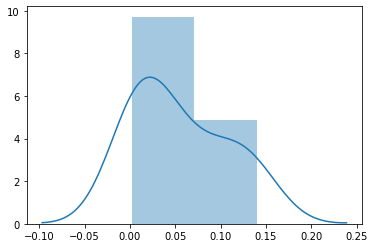

In [31]:
# 6. gaurav tries 8 questions per day with 75% correction rate
#    barkha tries 12 questions per day with a 45% correction rate
#    find the probability of them solving 5,4,6 questions correctly and show the factors affecting this with a pictorial graph

# lets use poission distribution for this

# gaurav is able to solve 6 questions correctly
# barkha is able to solve 5.4 question correctly

g_mean = 8*0.75
b_mean = 8*0.45
mean = g_mean
for j in ["gaurav", "barkha"]:
    for i in [1,2,3,4,5,6]:
        print("The probability of {0} solving {1} questions is: {2}".format(j,i,stats.poisson.pmf(i, mean)))
    print()
    mean = b_mean
    
# The 2 factors affecting their performance are the number of question they try to solve and the number of questions they are 
# able to correctly solve

# both are directly proportional to the number of questions they can solve

# lets see how their probability to answer 8 questions varies when we increase their attempts and success rate
x = []
y = []
for i in range(8,20): # no of questions attempted
    x.append(stats.poisson.pmf(8, i))
    
for i in range(8,20): # no of questions solved correctly out of 20
    y.append(stats.poisson.pmf(i,20))
    
sns.distplot(x);


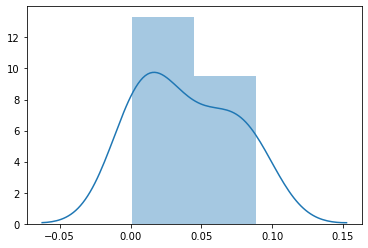

In [32]:
sns.distplot(y);

The answer is 
 for 5 customers: 0.17474768364388296 
 for not more then 3 customers: 0.29422991649656405 
 for more then 3 customers: 0.705770083503436


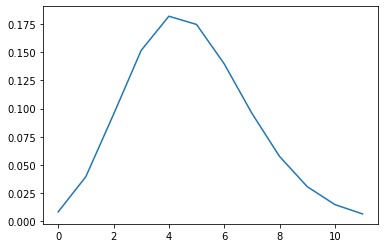

In [59]:
# 7. customers arrive at the rate of 72 per hour...
# probability of 5, not more then 3, more then 3 customers arriving

# 1 hour has 60 minutes...
# 72/60*4 is mean customers in 4 minutes

mean = 72/60*4 # in 4 min

# 5
ans1 = stats.poisson.pmf(5, mean)

ans2 = 0
for i in [0,1,2,3]:
    ans2 += stats.poisson.pmf(i,mean)
    
ans3 = 1-ans2

print("""The answer is \n for 5 customers: {0} \n for not more then 3 customers: {1} 
 for more then 3 customers: {2}""".format(ans1,ans2,ans3))

# plot of poissons distibution
x = np.arange(0,12,1)
y = stats.poisson.pmf(x, mu=mean)
plt.plot(x,y)
plt.show()

For 455 words the probability of making only 2 errors is: 2.51536143880336e-13


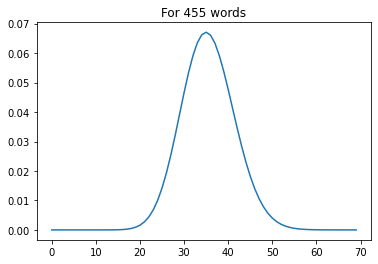

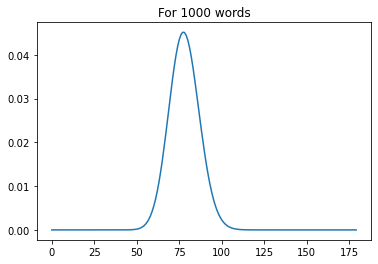

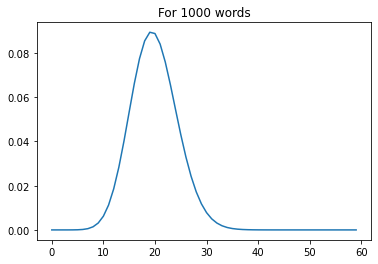

In [71]:
# 8. a guy writes 77 words with 6 errors on avg
# probability of exactly 2 errors in 455 words?

#for 455 words
mean = 455*6/77

ans1 = stats.poisson.pmf(2,mean) # 2 errors
print("For 455 words the probability of making only 2 errors is: " + str(ans1))

x = np.arange(0,70,1)
y = stats.poisson.pmf(x, mu=mean)
plt.plot(x,y)
plt.title("For 455 words")
plt.show()

# the probability of making a larger number of errors will increase as the number of words increase

# mean errors will increase as the number of words increase

# the pmf for any particular number of errors will decrease as we increase the number of words...

mean = 1000*6/77
x = np.arange(0,180,1)
y = stats.poisson.pmf(x, mu=mean)
plt.plot(x,y)
plt.title("For 1000 words")
plt.show()

mean = 255*6/77
x = np.arange(0,60,1)
y = stats.poisson.pmf(x, mu=mean)
plt.plot(x,y)
plt.title("For 255 words")
plt.show()

In [100]:
# 9. a 12.5mm hole is driled in a metal sheet, there are errors which cause holes to be bigger in size sometimes..
# if holes above 12.6mm are scrapped what is the percentage of those scrapped metal sheets
# and cdf at 11mm
# and conclusion of it all
# pdf for size of holes is  f(d) = 20e−20(d−12.5), d ≥ 12.5


import math

# if we take the integral then we get the formula -e(-20(d-12.5))
# we'll calculate the proportion of parts not scrapped (btw 12.5mm and 12.6mm)
x1 = -math.exp(-20*(12.5-12.5))
x2 = -math.exp(-20*(12.6-12.5))

not_scrapped = x2-x1
scrapped = (1-not_scrapped)*100
print("percentage of parts scrapped: " + str(round(scrapped,2)) + "%")

# since a disturbance can cause the size of a hole to only increase in size,
# the CDF when diameter=11mm will be not existent i.e, = 0

# conclusion:

# the given pdf tells us that a hole can be of larger in size but not smaller.. 
# the number of holes of 12.5mm exaclty are very less in number

# however if holes greater than 12.6mm are scrapped then we have 86.46% of sheets usuable

percentage of parts scrapped: 13.53%


0.8646647167633863

In [169]:
# 10. 
# a) compute the following  P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6) 

def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

def p_to_z(x):
    constant = x* math.sqrt(2*math.pi)
    return math.sqrt(2.0*math.log(constant))
a1, _ = quad(normalProbabilityDensity, 1.26, np.PINF)
a2, _ = quad(normalProbabilityDensity, np.NINF, -0.86)
a3, _ = quad(normalProbabilityDensity, -1.37, np.PINF)
a4, _ = quad(normalProbabilityDensity, -1.25,0.37)
a5, _ = quad(normalProbabilityDensity, np.NINF, -4.6)

print("a) \ni) {0} \nii) {1}\niii) {2}\niv) {3}\nv) {4}".format(a1,a2,a3,a4,a5),end="\n\n")
# b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05

for i in np.arange(-1.67,4.3,0.01):
    a1, _ = quad(normalProbabilityDensity, i, np.PINF)
    if (1-a1)>=0.05:
        print("b) z = " + str(i) )
        break
    
# quad(p_to_z, 0,1.26)
# c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 

for i in np.arange(+1.67,4.3,0.01):
    a1, _ = quad(normalProbabilityDensity, -i, i)
    if (a1)>=0.99:
        print("c) z = " + str(i) )
        break


a) 
i) 0.10383468112130043 
ii) 0.19489452125180842
iii) 0.914656549178033
iv) 0.5386589811336916
v) 2.1124545922985606e-06

b) z = -1.64
c) z = 2.580000000000001


In [173]:
# 11. a copper wire has mean current of 10mA and variance of 4(mA)^2
# find P(current>13mA)
# find P(9mA<current<11mA)
# P(z) = 0.98, find z

# a)
mean = 10
std_d = 2
z1 = (13-mean)/std_d
a1, _ = quad(normalProbabilityDensity, np.NINF, z1)
print("a) " + str(1-a1))

# b)
z2a = (9-mean)/std_d
z2b = (11-mean)/std_d
a1, _ = quad(normalProbabilityDensity, np.NINF, z2a)
a2, _ = quad(normalProbabilityDensity, z2b, np.PINF)
print("b) " + str(1-(a1+a2)))


# c)

for i in np.arange(+1.67,4.3,0.01):
    a1, _ = quad(normalProbabilityDensity, -i, i)
    if (a1)>=0.98:
        print("c) z = " + str(i) )
        break


a) 0.06680720126885797
b) 0.3829249225480261
c) z = 2.3300000000000005


In [174]:
# 12. a shaft in a piston has diameter of 0.2508mm and std.dev = 0.0005

# a) if we accept a deviation of 0.2500+/-0.0015 what is the percentage of pistons accepted

za1 = (0.2485-0.2508)/0.0005
za2 = (0.2515-0.2508)/0.0005

a1, _ = quad(normalProbabilityDensity, za1, za2)
print("a) " + str(a1*100))


# b) if the mean is 0.2500 then find the pecentage of accepted 

zb1 = (0.2485-0.2500)/0.0005
zb2 = (0.2515-0.2500)/0.0005

a2, _ = quad(normalProbabilityDensity, zb1, zb2)
print("a) " + str(a2))

a) 91.924122831152
a) 0.9973002039367398
